In [1]:
import matplotlib.pyplot as plt 

from CCio import load_crystals_from_h5

from CCplot import plot1d
from CCplot import auto_plot_style

In [2]:
auto_plot_style()

In [3]:
def subtract_baseline(x):
    x = x.astype(float)
    return x - x[-20:].mean()

def load(filename):
    df = load_crystals_from_h5(filename)
    df = df.assign(bkgsub  = df.groupby("state").counts.apply(subtract_baseline))
    df = df.assign(dquanta = df.bkgsub / df.power)
    return df

In [4]:
nopaint = load("/home/gonzalo/data/CC/quartz_scan2/nopaint.h5")
nopaint.head()

looparound  crystal  grating  exp_index  slit_width  state  exposure  \
0        True        5        2          0        1000      0       5.0   
1        True        5        2          0        1000      0       5.0   
2        True        5        2          0        1000      0       5.0   
3        True        5        2          0        1000      0       5.0   
4        True        5        2          0        1000      0       5.0   

   ex_wl     power           timestamp  em_wl  counts  bkgsub       dquanta  
0  800.0  0.000002 2020-03-02 15:37:10  828.5    3153    68.0  3.890787e+07  
1  800.0  0.000002 2020-03-02 15:37:10  829.0    3148    63.0  3.604700e+07  
2  800.0  0.000002 2020-03-02 15:37:10  829.5    3123    38.0  2.174263e+07  
3  800.0  0.000002 2020-03-02 15:37:10  830.0    3123    38.0  2.174263e+07  
4  800.0  0.000002 2020-03-02 15:37:10  830.5    3114    29.0  1.659306e+07

In [5]:
nopaint2 = load("/home/gonzalo/data/CC/quartz_scan2/nopaint2.h5")
nopaint2.head()

looparound  crystal  grating  exp_index  slit_width  state  exposure  \
0        True        5        2          0        1000      0       5.0   
1        True        5        2          0        1000      0       5.0   
2        True        5        2          0        1000      0       5.0   
3        True        5        2          0        1000      0       5.0   
4        True        5        2          0        1000      0       5.0   

   ex_wl     power           timestamp  em_wl  counts  bkgsub       dquanta  
0  800.0  0.000002 2020-03-02 21:33:12  828.5    3157   66.65  3.800886e+07  
1  800.0  0.000002 2020-03-02 21:33:12  829.0    3161   70.65  4.028996e+07  
2  800.0  0.000002 2020-03-02 21:33:12  829.5    3150   59.65  3.401693e+07  
3  800.0  0.000002 2020-03-02 21:33:12  830.0    3148   57.65  3.287638e+07  
4  800.0  0.000002 2020-03-02 21:33:12  830.5    3136   45.65  2.603307e+07

In [6]:
nopaint3 = load("/home/gonzalo/data/CC/quartz_scan2/nopaint3.h5")
nopaint3.head()

looparound  crystal  grating  exp_index  slit_width  state  exposure  \
0        True        5        2          0        1000      0       5.0   
1        True        5        2          0        1000      0       5.0   
2        True        5        2          0        1000      0       5.0   
3        True        5        2          0        1000      0       5.0   
4        True        5        2          0        1000      0       5.0   

   ex_wl     power           timestamp  em_wl  counts  bkgsub       dquanta  
0  800.0  0.000002 2020-03-03 08:35:11  828.5    3174    73.9  4.421564e+07  
1  800.0  0.000002 2020-03-03 08:35:11  829.0    3135    34.9  2.088127e+07  
2  800.0  0.000002 2020-03-03 08:35:11  829.5    3123    22.9  1.370146e+07  
3  800.0  0.000002 2020-03-03 08:35:11  830.0    3147    46.9  2.806107e+07  
4  800.0  0.000002 2020-03-03 08:35:11  830.5    3165    64.9  3.883078e+07

In [7]:
paint = load("/home/gonzalo/data/CC/quartz_scan2/paint.h5")
paint.head()

looparound  crystal  grating  exp_index  slit_width  state  exposure  \
0        True        5        2          0        1000      0       5.0   
1        True        5        2          0        1000      0       5.0   
2        True        5        2          0        1000      0       5.0   
3        True        5        2          0        1000      0       5.0   
4        True        5        2          0        1000      0       5.0   

   ex_wl     power           timestamp  em_wl  counts  bkgsub       dquanta  
0  800.0  0.000002 2020-03-02 13:29:42  828.5    3142   57.15  3.274851e+07  
1  800.0  0.000002 2020-03-02 13:29:42  829.0    3132   47.15  2.701824e+07  
2  800.0  0.000002 2020-03-02 13:29:42  829.5    3116   31.15  1.784980e+07  
3  800.0  0.000002 2020-03-02 13:29:42  830.0    3118   33.15  1.899586e+07  
4  800.0  0.000002 2020-03-02 13:29:42  830.5    3100   15.15  8.681364e+06

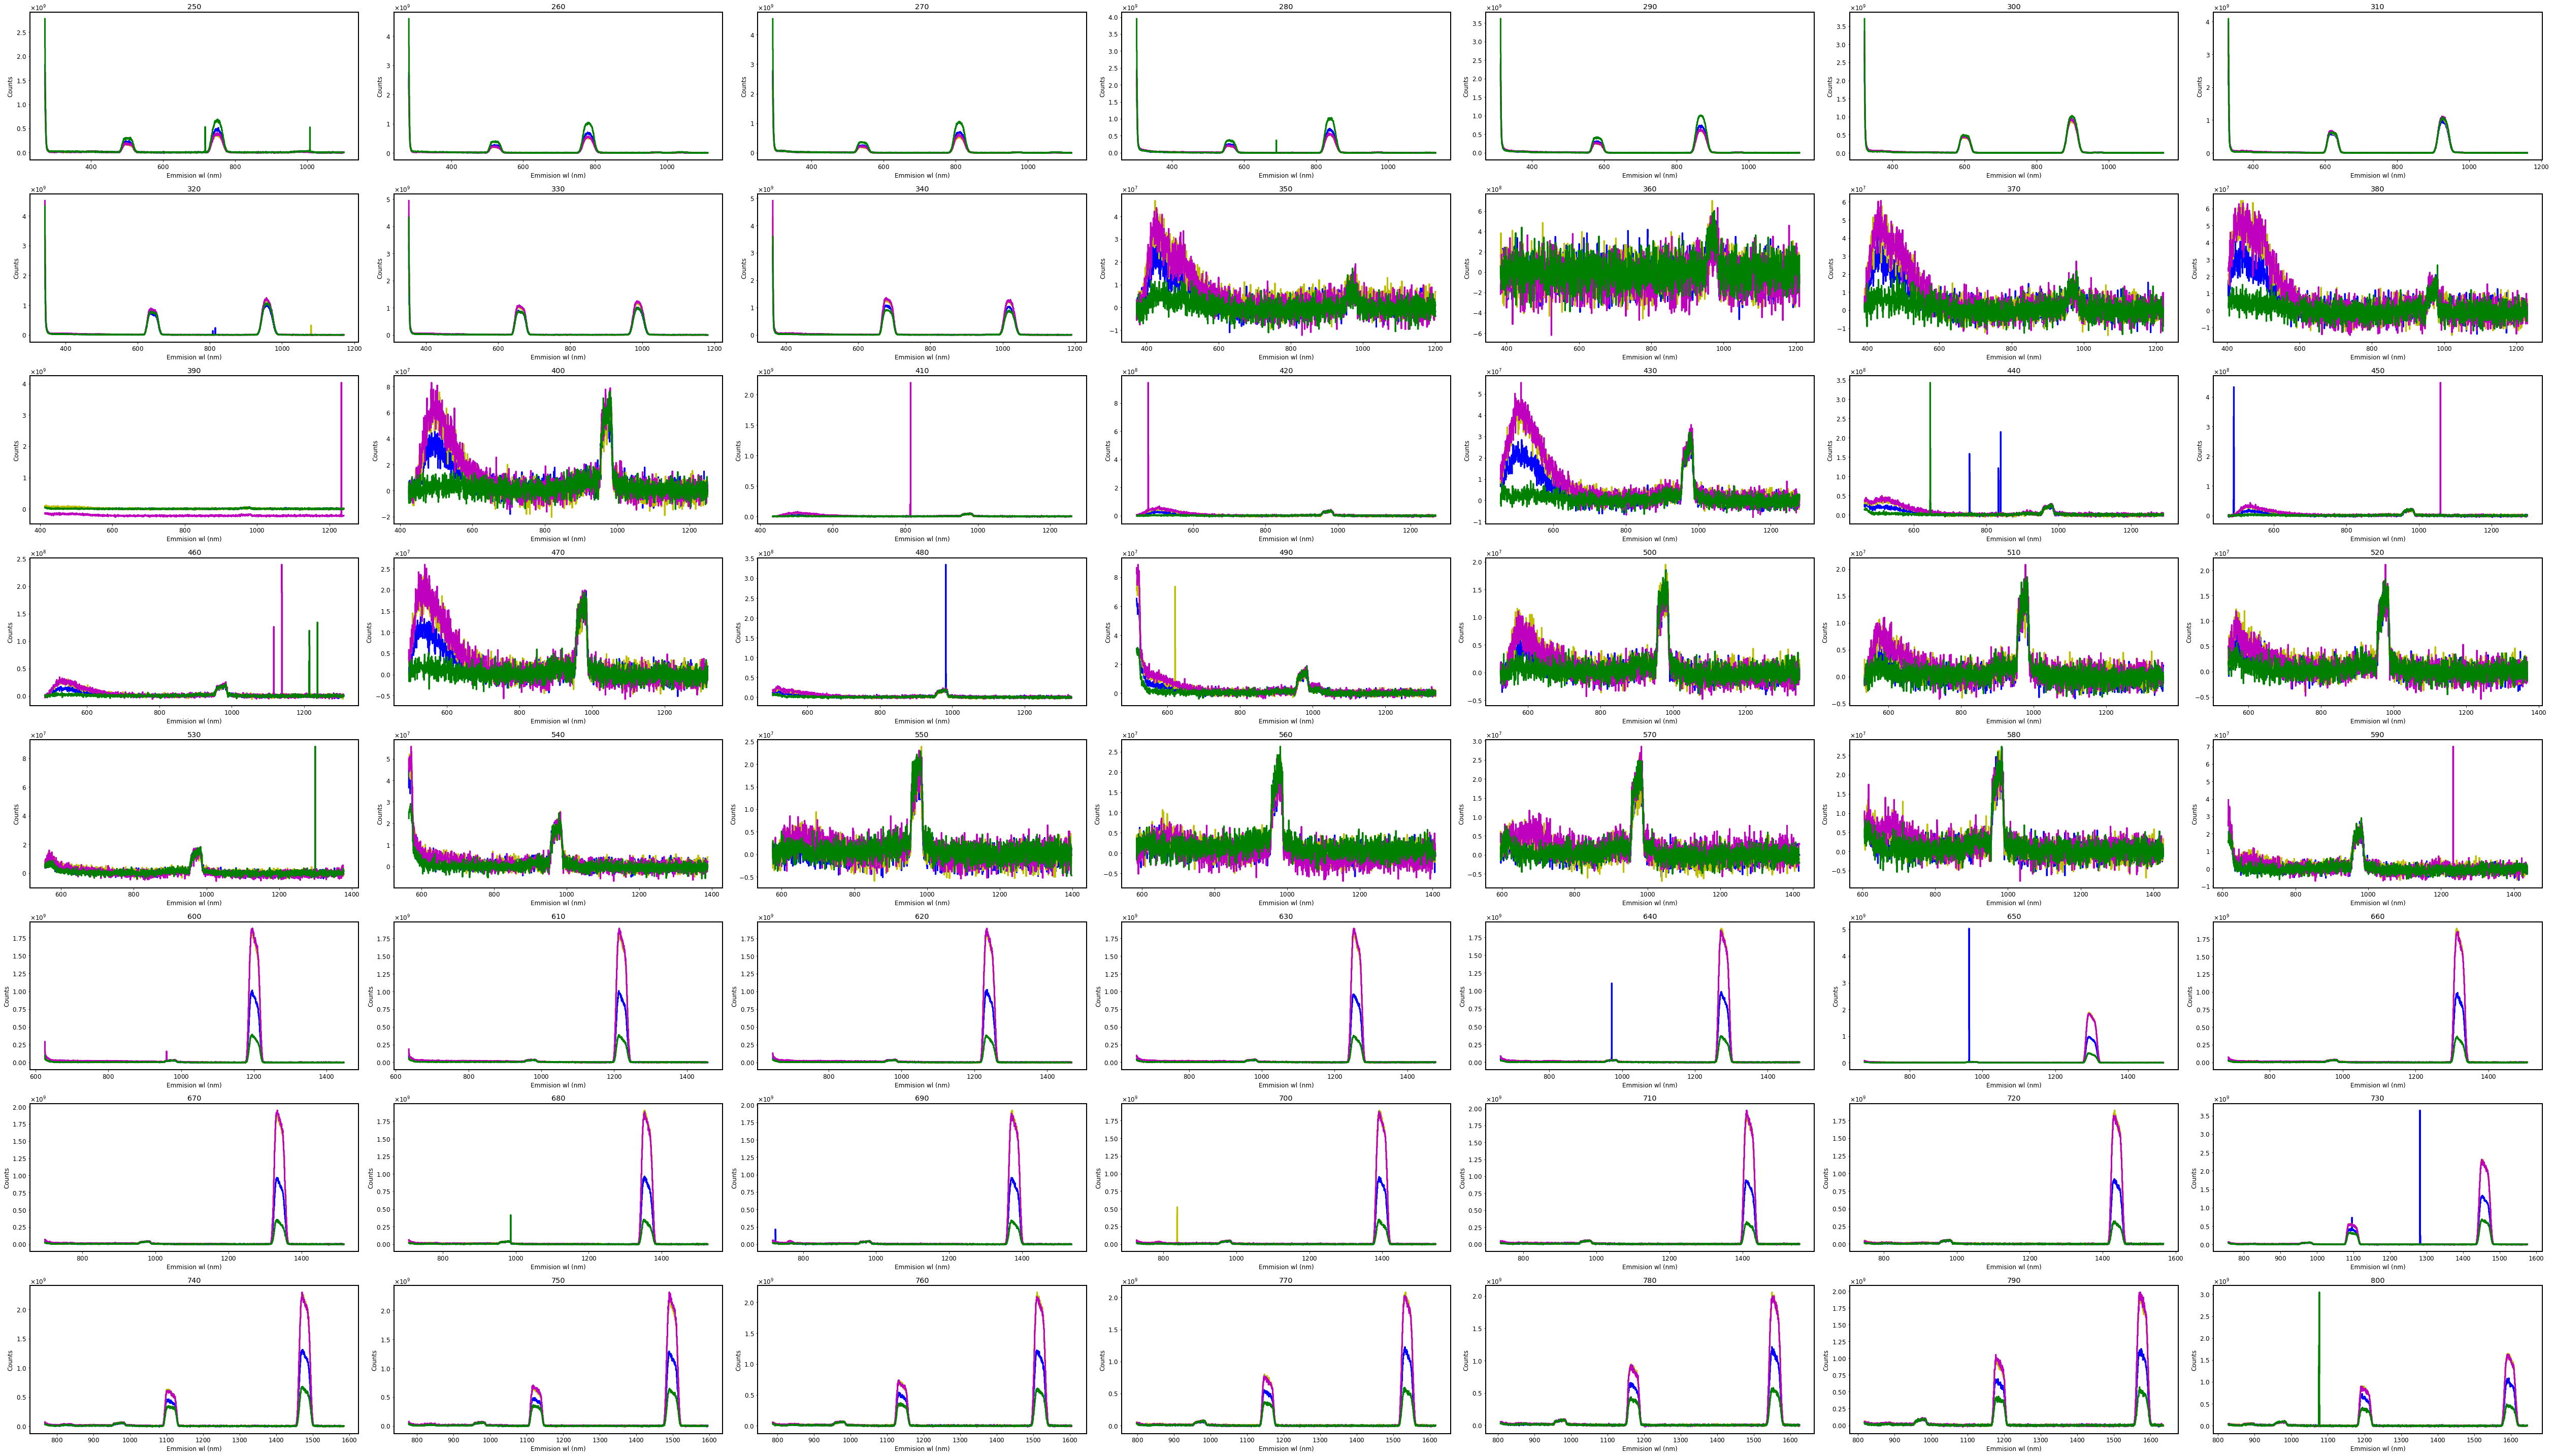

In [8]:
plt.figure(figsize=(10*7, 8*5))

nopaint_g  = nopaint .groupby("ex_wl")
nopaint2_g = nopaint2.groupby("ex_wl")
nopaint3_g = nopaint3.groupby("ex_wl")
paint_g    =   paint .groupby("ex_wl")

for exwl in range(250, 810, 10):
    n1 = nopaint_g .get_group(exwl)
    n2 = nopaint2_g.get_group(exwl)
    n3 = nopaint3_g.get_group(exwl)
    p1 =   paint_g .get_group(exwl)

    plt.subplot(8, 7, (exwl - 250) // 10 + 1)
    plot1d(n1.em_wl, n1.dquanta, color="b")
    plot1d(n2.em_wl, n2.dquanta, color="y")
    plot1d(n3.em_wl, n3.dquanta, color="m")
    plot1d(p1.em_wl, p1.dquanta, color="g", title=str(exwl))
    
plt.tight_layout()
plt.savefig("/home/gonzalo/Escritorio/p2.pdf")